# import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold,LeaveOneOut,RepeatedKFold

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,roc_curve, auc
from sklearn.metrics import confusion_matrix

from scipy.stats import gaussian_kde
import numpy as np

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# raw data set

In [5]:
train_set = pd.read_excel('one-hot-xunlian-96.xlsx')
train_set

,Reaction temperature,Alkali concentration,Alcohol ether ratio,glycerin,EG,Ethanol,n-butanol,n-propanol,n-pentanol,Methanol,NaOH,KOH,DIX,DME,MCS,THF,Type
0,40,4,4.000000,0,0,0,0,0,1,0,1,0,0,0,1,0,1
1,40,1,1.500000,0,0,0,0,0,0,1,0,1,0,1,0,0,1
2,40,4,4.000000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,40,3,0.666667,0,0,0,0,1,0,0,0,1,0,0,0,1,1
4,40,2,0.250000,0,0,0,1,0,0,0,1,0,1,0,0,0,0
5,40,1,1.500000,0,0,0,0,0,1,0,0,1,0,1,0,0,1
6,40,3,0.666667,1,0,0,0,0,0,0,0,1,0,0,0,1,1
7,40,2,0.250000,0,0,0,0,0,0,1,1,0,0,1,0,0,1
8,40,4,4.000000,0,0,0,0,1,0,0,1,0,0,0,1,0,1
9,40,3,0.666667,0,0,0,1,0,0,0,0,1,0,0,0,1,1


In [6]:

data_train=pd.DataFrame(train_set)
x_train = data_train.iloc[:,0:-1]
y_train = data_train.iloc[:,-1]

In [7]:
test_set = pd.read_excel('one-hot-ceshi-24.xlsx')
test_set

,Reaction temperature,Alkali concentration,Alcohol ether ratio,glycerin,EG,Ethanol,n-butanol,n-propanol,n-pentanol,Methanol,NaOH,KOH,DIX,DME,MCS,THF,Type
0,40,4,4.000000,0,0,0,0,0,0,1,1,0,0,0,1,0,1
1,40,3,0.666667,0,0,1,0,0,0,0,0,1,0,0,0,1,1
2,40,2,0.250000,0,0,0,0,1,0,0,1,0,1,0,0,0,1
3,40,1,1.500000,0,0,0,1,0,0,0,0,1,0,1,0,0,1
4,40,3,0.666667,0,1,0,0,0,0,0,0,1,0,0,0,1,0
5,40,2,0.250000,1,0,0,0,0,0,0,1,0,1,0,0,0,0
6,40,4,4.000000,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7,40,1,1.500000,0,0,1,0,0,0,0,0,1,0,1,0,0,0
8,60,3,0.666667,0,0,0,1,0,0,0,1,0,0,0,0,1,1
9,60,1,0.250000,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [8]:

data_test=pd.DataFrame(test_set)
x_test = data_test.iloc[:,0:-1]
y_test = data_test.iloc[:,-1]

# Define Function Model - Heatmap

In [9]:
def traing_process_accurary(clf, tuned_parameters,X_train, y_train,X_test,y_test ):
    scores = ['accuracy']
    fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state =15)
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(clf,
                           tuned_parameters,
                           cv=fold,
                           scoring='%s' % score,
                           n_jobs=-1,
                           verbose=5,
                           return_train_score=True)
        clf.fit(X_train, y_train)

        #print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print(clf.best_score_)
        
        print()
        print("Grid scores on development set:")
        #print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']

        for mean, std, mean_train, std_train, params in zip(
                means, stds, means_train, stds_train,
                clf.cv_results_['params']):
            print("test set：%0.3f (+/-%0.03f) training set：%0.3f (+/-%0.03f)for %r" %
                  (mean, std * 2, mean_train, std_train*2, params))
    print('/n')
    print('training set：'+str(max(means_train)))
    print('test set：'+str(max(means)))
        
    print(classification_report(y_test,clf.predict(X_test)))        
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("accuracy: "+str(accuracy))
    from sklearn.metrics import f1_score
    f1_x_test = f1_score(y_test,y_pred)
    print("f1_score: "+str(f1_x_test))
    precision = precision_score(y_test,y_pred)
    print("precision: "+str(precision))
    recall = recall_score(y_test,y_pred)
    print("recall: "+str(recall))
    X_test.to_csv("ceshiji.csv")

    y_trainpred = clf.predict(X_train)
    cm = confusion_matrix(y_pred,y_test,labels=[0,1])
    sns.heatmap(cm,annot=True)
    font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal', 'size': 15}
    plt.savefig('hunxiao_png',dpi=1000)
    
    
  
    
    
    return y_trainpred,y_pred,means_train,means

# Define Function Model-ROC

In [10]:
def traing_process_roc(clf, tuned_parameters,X_train, y_train,X_test,y_test ):
   
    scores = ['accuracy']
    fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state =15)
    for score in scores:
        

        clf = GridSearchCV(clf,
                           tuned_parameters,
                           cv=fold,
                           scoring='%s' % score,
                           n_jobs=-1,
                           verbose=5,
                           return_train_score=True)
        clf.fit(X_train, y_train)
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']

       
         
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
   
    from sklearn.metrics import f1_score
    f1_x_test = f1_score(y_test,y_pred)
    
    precision = precision_score(y_test,y_pred)
    
    recall = recall_score(y_test,y_pred)
    
    y_trainpred = clf.predict(X_train)
  

 
    
    
    fpr_xgb, tpr_xgb, thr_xgb = roc_curve(y_test, y_pred)
    plt.plot(fpr_xgb, tpr_xgb, linestyle='-')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    
    return fpr_xgb,tpr_xgb

# traditional model

## KNN

# Tuning hyper-parameters for accuracy

Fitting 10 folds for each of 13 candidates, totalling 130 fits

{'n_neighbors': 4}
0.7477777777777777

Grid scores on development set:
test set：0.654 (+/-0.239) training set：0.880 (+/-0.033)for {'n_neighbors': 2}
test set：0.714 (+/-0.323) training set：0.844 (+/-0.036)for {'n_neighbors': 3}
test set：0.748 (+/-0.276) training set：0.808 (+/-0.028)for {'n_neighbors': 4}
test set：0.737 (+/-0.343) training set：0.819 (+/-0.035)for {'n_neighbors': 5}
test set：0.707 (+/-0.347) training set：0.803 (+/-0.027)for {'n_neighbors': 6}
test set：0.687 (+/-0.349) training set：0.794 (+/-0.025)for {'n_neighbors': 7}
test set：0.698 (+/-0.345) training set：0.792 (+/-0.023)for {'n_neighbors': 8}
test set：0.729 (+/-0.365) training set：0.794 (+/-0.036)for {'n_neighbors': 9}
test set：0.739 (+/-0.377) training set：0.792 (+/-0.036)for {'n_neighbors': 10}
test set：0.738 (+/-0.342) training set：0.781 (+/-0.047)for {'n_neighbors': 11}
test set：0.727 (+/-0.329) training set：0.78

(array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1]),
 array([0.87964448, 0.84367816, 0.8078054 , 0.81944667, 0.80319433,
        0.79398557, 0.79165998, 0.7939722 , 0.79167335, 0.78124833,
        0.78934777, 0.78123496, 0.78356055]),
 array([0.65444444, 0.71444444, 0.74777778, 0.73666667, 0.70666667,
        0.68666667, 0.69777778, 0.72888889, 0.73888889, 0.73777778,
        0.72666667, 0.72666667, 0.70666667]))

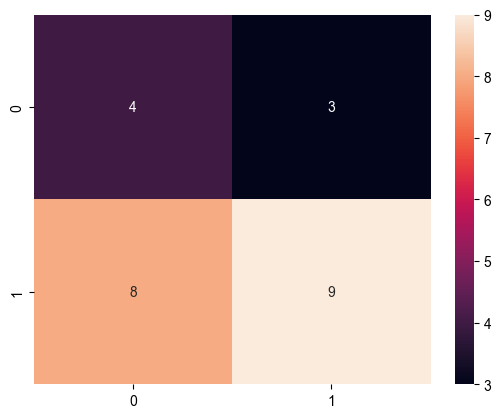

In [11]:
parameters_knn = {'n_neighbors':np.arange(2,15,1)}
knn= KNeighborsClassifier()
traing_process_accurary(knn,parameters_knn,x_train,y_train,x_test,y_test)

[CV 5/10] END n_neighbors=2;, score=(train=0.872, test=0.800) total time=   0.0s
[CV 5/10] END n_neighbors=4;, score=(train=0.802, test=0.900) total time=   0.0s
[CV 10/10] END n_neighbors=4;, score=(train=0.828, test=0.556) total time=   0.0s
[CV 9/10] END n_neighbors=5;, score=(train=0.816, test=0.333) total time=   0.0s
[CV 9/10] END n_neighbors=6;, score=(train=0.816, test=0.444) total time=   0.0s
[CV 1/10] END n_neighbors=8;, score=(train=0.802, test=0.600) total time=   0.0s
[CV 5/10] END n_neighbors=9;, score=(train=0.767, test=0.900) total time=   0.0s
[CV 1/10] END n_neighbors=11;, score=(train=0.779, test=0.800) total time=   0.0s
[CV 10/10] END n_neighbors=12;, score=(train=0.805, test=0.667) total time=   0.0s
[CV 7/10] END n_neighbors=3;, score=(train=0.851, test=0.778) total time=   0.0s
[CV 6/10] END n_neighbors=9;, score=(train=0.802, test=0.600) total time=   0.0s
[CV 4/10] END n_neighbors=11;, score=(train=0.779, test=0.700) total time=   0.0s
[CV 2/10] END n_neighbo

Fitting 10 folds for each of 13 candidates, totalling 130 fits


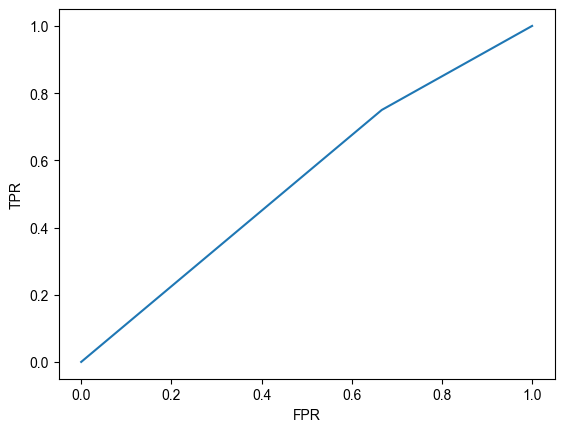

In [12]:
fpr_knn,tpr_knn = traing_process_roc(knn,parameters_knn,x_train,y_train,x_test,y_test)

In [13]:
fpr_knn

array([0.        , 0.66666667, 1.        ])

In [14]:
tpr_knn

array([0.  , 0.75, 1.  ])

## SVM

# Tuning hyper-parameters for accuracy

[CV 1/10] END n_neighbors=3;, score=(train=0.849, test=0.500) total time=   0.0s
[CV 6/10] END n_neighbors=9;, score=(train=0.802, test=0.600) total time=   0.0s
[CV 2/10] END n_neighbors=11;, score=(train=0.814, test=0.600) total time=   0.0s
[CV 2/10] END n_neighbors=13;, score=(train=0.814, test=0.600) total time=   0.0s
[CV 5/10] END n_neighbors=3;, score=(train=0.837, test=0.900) total time=   0.0s
[CV 8/10] END n_neighbors=10;, score=(train=0.770, test=1.000) total time=   0.0s
[CV 10/10] END n_neighbors=12;, score=(train=0.805, test=0.667) total time=   0.0s
[CV 8/10] END n_neighbors=3;, score=(train=0.839, test=0.556) total time=   0.0s
[CV 4/10] END n_neighbors=11;, score=(train=0.779, test=0.700) total time=   0.0s
[CV 3/10] END n_neighbors=13;, score=(train=0.744, test=0.900) total time=   0.0s
[CV 3/10] END n_neighbors=3;, score=(train=0.826, test=0.900) total time=   0.0s
[CV 10/10] END n_neighbors=9;, score=(train=0.805, test=0.667)

Fitting 10 folds for each of 36 candidates, totalling 360 fits

{'C': 1, 'gamma': 0.05, 'kernel': 'linear'}
0.8011111111111111

Grid scores on development set:
test set：0.751 (+/-0.298) training set：0.806 (+/-0.040)for {'C': 0.1, 'gamma': 0.05, 'kernel': 'linear'}
test set：0.684 (+/-0.326) training set：0.687 (+/-0.035)for {'C': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}
test set：0.684 (+/-0.326) training set：0.687 (+/-0.035)for {'C': 0.1, 'gamma': 0.05, 'kernel': 'sigmoid'}
test set：0.751 (+/-0.298) training set：0.806 (+/-0.040)for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
test set：0.684 (+/-0.326) training set：0.687 (+/-0.035)for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
test set：0.684 (+/-0.326) training set：0.687 (+/-0.035)for {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
test set：0.751 (+/-0.298) training set：0.806 (+/-0.040)for {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}
test set：0.684 (+/-0.326) training set：0.687 (+/-0.035)for {'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}
test set：0.6

(array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 1]),
 array([0.80554665, 0.68746325, 0.68746325, 0.80554665, 0.68746325,
        0.68746325, 0.80554665, 0.68746325, 0.68746325, 0.80554665,
        0.68746325, 0.68746325, 0.84256883, 0.76046512, 0.68746325,
        0.84256883, 0.77773323, 0.68746325, 0.84256883, 0.76849773,
        0.68746325, 0.84256883, 0.69784817, 0.68746325, 0.84140604,
        0.79048383, 0.68746325, 0.84140604, 0.82066292, 0.68746325,
        0.84140604, 0.96872494, 0.68746325, 0.84140604, 0.99075114,
        0.68746325]),
 array([0.75111111, 0.68444444, 0.68444444, 0.75111111, 0.68444444,
        0.6844

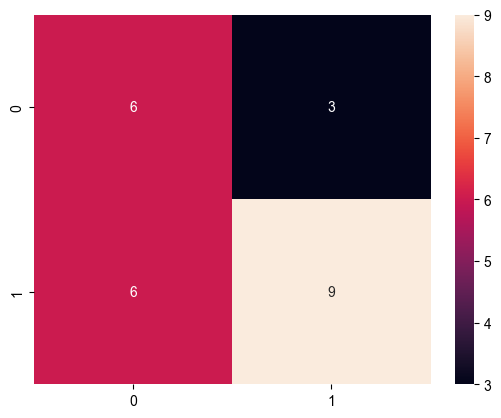

In [15]:
svr = SVC()
param_grid_svr = {'kernel':['linear','rbf','sigmoid'],
              
              'gamma':[0.05,0.1,0.5,1],
              'C':[0.1,0.5,1],
             # 'epsilon':[0.001,0.005,0.03,0.01,0.1,1]
             }
traing_process_accurary(svr,param_grid_svr,x_train,y_train,x_test,y_test)

[CV 10/10] END C=0.1, gamma=0.05, kernel=rbf;, score=(train=0.667, test=0.889) total time=   0.0s
[CV 1/10] END C=0.5, gamma=0.05, kernel=linear;, score=(train=0.860, test=0.600) total time=   0.0s
[CV 2/10] END C=0.5, gamma=0.05, kernel=linear;, score=(train=0.860, test=0.600) total time=   0.0s
[CV 1/10] END C=0.5, gamma=0.1, kernel=rbf;, score=(train=0.802, test=0.800) total time=   0.0s
[CV 2/10] END C=0.5, gamma=0.1, kernel=rbf;, score=(train=0.791, test=0.600) total time=   0.0s
[CV 3/10] END C=0.5, gamma=0.1, kernel=rbf;, score=(train=0.767, test=0.800) total time=   0.0s
[CV 4/10] END C=0.5, gamma=0.1, kernel=rbf;, score=(train=0.767, test=0.700) total time=   0.0s
[CV 1/10] END C=1, gamma=0.05, kernel=linear;, score=(train=0.849, test=0.600) total time=   0.0s
[CV 2/10] END C=1, gamma=0.05, kernel=linear;, score=(train=0.884, test=0.700) total time=   0.0s
[CV 3/10] END C=1, gamma=0.05, kernel=linear;, score=(train=0.826, test=0.900) total time=   0.0s
[CV 4/10] END C=1, gamma

Fitting 10 folds for each of 36 candidates, totalling 360 fits


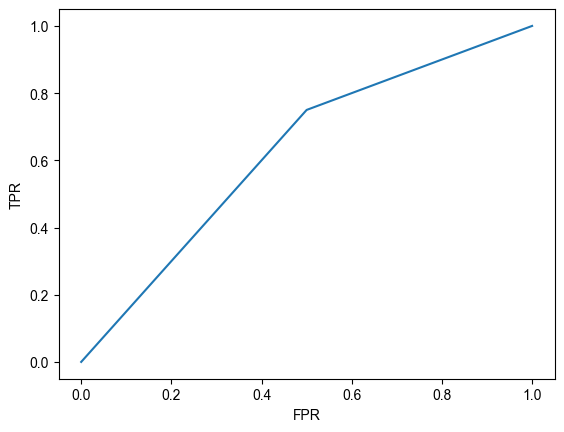

In [16]:
fpr_svr,tpr_svr = traing_process_roc(svr,param_grid_svr,x_train,y_train,x_test,y_test)

In [17]:
fpr_svr

array([0. , 0.5, 1. ])

In [18]:
tpr_svr 

array([0.  , 0.75, 1.  ])

## DT

# Tuning hyper-parameters for accuracy

[CV 5/10] END C=0.1, gamma=0.05, kernel=linear;, score=(train=0.791, test=0.900) total time=   0.0s
[CV 4/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.814, test=0.700) total time=   0.0s
[CV 10/10] END C=0.1, gamma=0.1, kernel=linear;, score=(train=0.816, test=0.556) total time=   0.0s
[CV 5/10] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.663, test=0.900) total time=   0.0s
[CV 2/10] END C=0.1, gamma=0.1, kernel=sigmoid;, score=(train=0.709, test=0.500) total time=   0.0s
[CV 1/10] END C=0.1, gamma=0.5, kernel=linear;, score=(train=0.826, test=0.600) total time=   0.0s
[CV 1/10] END C=0.1, gamma=0.5, kernel=rbf;, score=(train=0.686, test=0.700) total time=   0.0s
[CV 5/10] END C=0.1, gamma=1, kernel=linear;, score=(train=0.791, test=0.900) total time=   0.0s
[CV 6/10] END C=0.1, gamma=1, kernel=linear;, score=(train=0.802, test=0.700) total time=   0.0s
[CV 7/10] END C=0.5, gamma=0.05, kernel=rbf;, score=(train=0.724, test=0.778

Fitting 10 folds for each of 9 candidates, totalling 90 fits

{'max_depth': 4}
0.8033333333333333

Grid scores on development set:
test set：0.778 (+/-0.285) training set：0.818 (+/-0.041)for {'max_depth': 2}
test set：0.739 (+/-0.263) training set：0.853 (+/-0.029)for {'max_depth': 3}
test set：0.803 (+/-0.233) training set：0.903 (+/-0.026)for {'max_depth': 4}
test set：0.772 (+/-0.220) training set：0.950 (+/-0.040)for {'max_depth': 5}
test set：0.752 (+/-0.273) training set：0.978 (+/-0.022)for {'max_depth': 6}
test set：0.750 (+/-0.204) training set：0.995 (+/-0.011)for {'max_depth': 7}
test set：0.750 (+/-0.204) training set：1.000 (+/-0.000)for {'max_depth': 8}
test set：0.750 (+/-0.204) training set：1.000 (+/-0.000)for {'max_depth': 9}
test set：0.750 (+/-0.204) training set：1.000 (+/-0.000)for {'max_depth': 10}
/n
training set：1.0
test set：0.8033333333333333
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.73    

(array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1]),
 array([0.81828388, 0.85302058, 0.90276664, 0.95024058, 0.97800053,
        0.99537557, 1.        , 1.        , 1.        ]),
 array([0.77777778, 0.73888889, 0.80333333, 0.77222222, 0.75222222,
        0.75      , 0.75      , 0.75      , 0.75      ]))

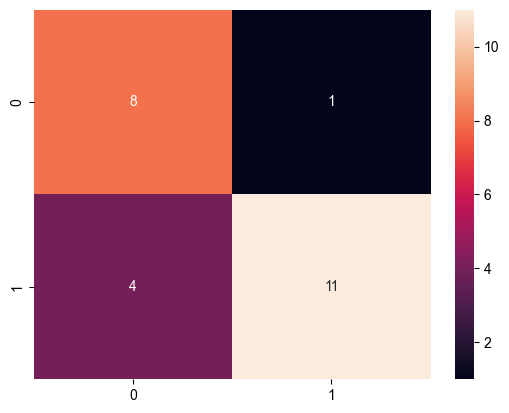

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state =15)
dt_para = {'max_depth':[2,3,4,5,6,7,8,9,10]}
traing_process_accurary(dt,dt_para,x_train,y_train,x_test,y_test)

[CV 3/10] END ..max_depth=3;, score=(train=0.849, test=0.800) total time=   0.0s
[CV 5/10] END ..max_depth=9;, score=(train=1.000, test=0.800) total time=   0.0s
[CV 2/10] END ..max_depth=2;, score=(train=0.849, test=0.600) total time=   0.0s
[CV 2/10] END ..max_depth=4;, score=(train=0.895, test=0.600) total time=   0.0s
[CV 4/10] END ..max_depth=4;, score=(train=0.907, test=0.700) total time=   0.0s
[CV 6/10] END ..max_depth=4;, score=(train=0.895, test=0.900) total time=   0.0s
[CV 9/10] END ..max_depth=4;, score=(train=0.908, test=0.778) total time=   0.0s
[CV 1/10] END ..max_depth=5;, score=(train=0.930, test=0.700) total time=   0.0s
[CV 4/10] END ..max_depth=5;, score=(train=0.965, test=0.700) total time=   0.0s
[CV 9/10] END ..max_depth=5;, score=(train=0.954, test=0.667) total time=   0.0s
[CV 3/10] END ..max_depth=6;, score=(train=0.977, test=0.800) total time=   0.0s
[CV 9/10] END ..max_depth=6;, score=(train=0.989, test=0.778) total time=   0.0s
[CV 5/10] END ..max_depth=7;

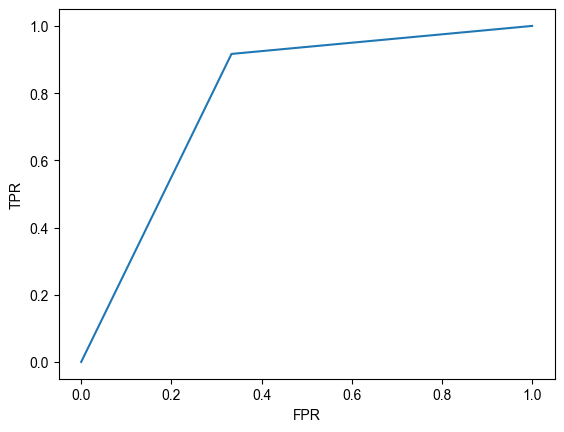

In [20]:
fpr_dt,tpr_dt = traing_process_roc(dt,dt_para,x_train,y_train,x_test,y_test)

In [21]:
fpr_dt

array([0.        , 0.33333333, 1.        ])

In [22]:
tpr_dt 

array([0.        , 0.91666667, 1.        ])

## MLP

# Tuning hyper-parameters for accuracy

[CV 7/10] END ..max_depth=2;, score=(train=0.816, test=0.778) total time=   0.0s
[CV 4/10] END ..max_depth=7;, score=(train=0.988, test=0.700) total time=   0.0s
[CV 4/10] END ..max_depth=8;, score=(train=1.000, test=0.700) total time=   0.0s
[CV 6/10] END ..max_depth=9;, score=(train=1.000, test=0.900) total time=   0.0s
[CV 8/10] END ..max_depth=2;, score=(train=0.782, test=0.889) total time=   0.0s
[CV 2/10] END ..max_depth=7;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 2/10] END ..max_depth=8;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 4/10] END ..max_depth=9;, score=(train=1.000, test=0.700) total time=   0.0s
[CV 9/10] END ..max_depth=9;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 5/10] END ..max_depth=2;, score=(train=0.791, test=0.900) total time=   0.0s
[CV 5/10] END ..max_depth=5;, score=(train=0.965, test=0.800) total time=   0.0s
[CV 1/10] END ..max_depth=6;, score=(train=0.965, test=0.600) total t

/home/sun/anaconda3/envs/zyj/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sun/anaconda3/envs/zyj/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sun/anaconda3/envs/zyj/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]),
 array([0.56587811, 0.68746325, 0.68746325]),
 array([0.55111111, 0.68444444, 0.68444444]))

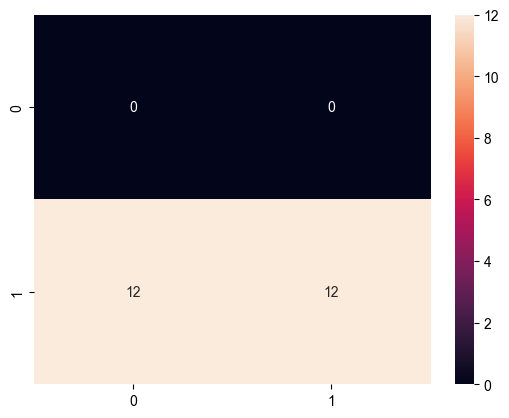

In [23]:
mlp_clf__tuned_parameters = {"hidden_layer_sizes": [(8,5),(100,),(8,5,2)],
                             #"solver": ['sgd', 'lbfgs','adam'],
                             #"max_iter": [25,30,50,100],
                             #"alpha": [0.0001,0.001,0.01],
                            
                             }
mlp = MLPClassifier(random_state=3)
traing_process_accurary(mlp,mlp_clf__tuned_parameters,x_train,y_train,x_test,y_test)

[CV 3/10] END hidden_layer_sizes=(100,);, score=(train=0.686, test=0.700) total time=   0.0s
[CV 5/10] END hidden_layer_sizes=(100,);, score=(train=0.663, test=0.900) total time=   0.0s
[CV 5/10] END hidden_layer_sizes=(8, 5);, score=(train=0.547, test=0.600) total time=   0.1s
[CV 5/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.663, test=0.900) total time=   0.0s
[CV 9/10] END hidden_layer_sizes=(8, 5);, score=(train=0.609, test=0.556) total time=   0.1s
[CV 7/10] END hidden_layer_sizes=(8, 5);, score=(train=0.552, test=0.556) total time=   0.1s
[CV 3/10] END hidden_layer_sizes=(8, 5);, score=(train=0.558, test=0.500) total time=   0.1s
[CV 3/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.686, test=0.700) total time=   0.0s
[CV 8/10] END hidden_layer_sizes=(8, 5);, score=(train=0.644, test=0.333) total time=   0.1s
[CV 1/10] END hidden_layer_sizes=(8, 5);, score=(train=0.547, test=0.600) total time=   0.1s
[CV 1/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.686,

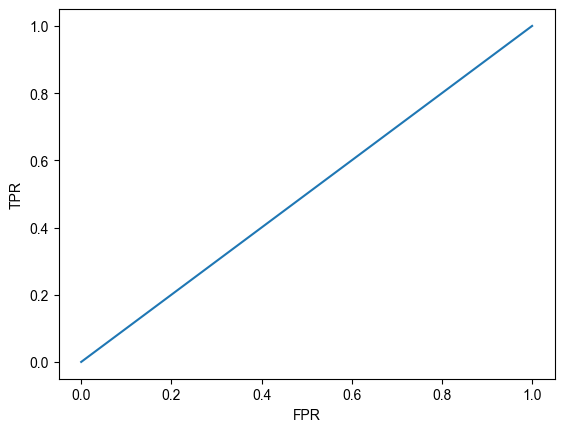

In [24]:
fpr_mlp,tpr_mlp = traing_process_roc(mlp,mlp_clf__tuned_parameters,x_train,y_train,x_test,y_test)

In [25]:
fpr_mlp

array([0., 1.])

In [26]:
tpr_mlp

array([0., 1.])

# ensemble model

## RF

# Tuning hyper-parameters for accuracy

[CV 1/10] END hidden_layer_sizes=(8, 5);, score=(train=0.547, test=0.600) total time=   0.1s
[CV 2/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.709, test=0.500) total time=   0.1s
[CV 4/10] END hidden_layer_sizes=(8, 5);, score=(train=0.535, test=0.700) total time=   0.1s
[CV 4/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.674, test=0.800) total time=   0.0s
[CV 8/10] END hidden_layer_sizes=(8, 5);, score=(train=0.644, test=0.333) total time=   0.1s
[CV 5/10] END hidden_layer_sizes=(100,);, score=(train=0.663, test=0.900) total time=   0.0s
[CV 3/10] END hidden_layer_sizes=(100,);, score=(train=0.686, test=0.700) total time=   0.0s
[CV 4/10] END hidden_layer_sizes=(100,);, score=(train=0.674, test=0.800) total time=   0.0s
[CV 5/10] END hidden_layer_sizes=(8, 5);, score=(train=0.547, test=0.600) total time=   0.1s
[CV 5/10] END hidden_layer_sizes=(8, 5, 2);, score=(train=0.663, test=0.900) total time=   0.0s
[CV 6/10] END hidden_

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1]),
 array([0.75807271, 0.77538091, 0.77423149, 0.79278268, 0.81017108,
        0.81015771, 0.9120556 , 0.92591553, 0.94558941, 0.95486501,
        0.96415397, 0.96182839, 0.94673884, 0.97225341, 0.98263833,
        0.98957498, 0.99767442, 0.99883721]),
 array([0.66      , 0.67222222, 0.68444444, 0.70555556, 0.68333333,
        0.68333333, 0.80111111, 0.75666667, 0.80111111, 0.81111111,
        0.79888889, 0.76666667, 0.76      , 0.81      , 0.81111111,
        0.77777778, 0.75666667, 0.76666667]))

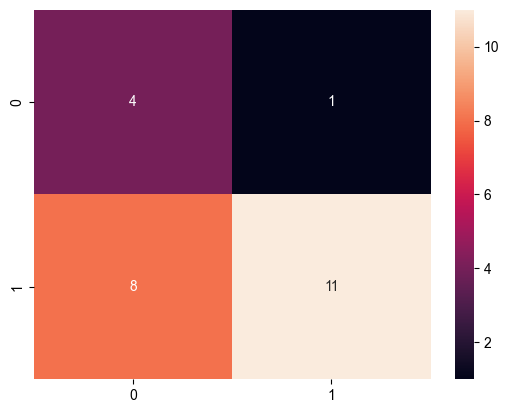

In [27]:
clf = RandomForestClassifier(random_state=0)



tuned_parameters = {
                    'n_estimators': [5,10,20,50, 100, 200]
                    # ,'criterion': ['gini', 'entropy']
                     ,'max_depth': [2, 5,7]
 #                   ,'max_features': ['log2', 'sqrt', 'int']
#                     ,'bootstrap': [True, False]
#                    rf_pred ,'warm_start': [True, False]
                    }
traing_process_accurary(clf,tuned_parameters,x_train,y_train,x_test,y_test)

[CV 3/10] END max_depth=2, n_estimators=5;, score=(train=0.756, test=0.800) total time=   0.0s
[CV 8/10] END max_depth=2, n_estimators=20;, score=(train=0.736, test=0.444) total time=   0.0s
[CV 8/10] END max_depth=2, n_estimators=50;, score=(train=0.747, test=0.556) total time=   0.1s
[CV 4/10] END max_depth=2, n_estimators=200;, score=(train=0.791, test=0.800) total time=   0.2s
[CV 1/10] END max_depth=5, n_estimators=100;, score=(train=0.953, test=0.800) total time=   0.1s
[CV 2/10] END max_depth=5, n_estimators=100;, score=(train=0.988, test=0.700) total time=   0.1s
[CV 2/10] END max_depth=2, n_estimators=10;, score=(train=0.802, test=0.500) total time=   0.0s
[CV 2/10] END max_depth=2, n_estimators=100;, score=(train=0.837, test=0.500) total time=   0.1s
[CV 2/10] END max_depth=5, n_estimators=5;, score=(train=0.953, test=0.600) total time=   0.0s
[CV 6/10] END max_depth=5, n_estimators=5;, score=(train=0.919, test=1.000) total time=   0.0s
[CV 1/10] END max_depth=5, n_estimators

Fitting 10 folds for each of 18 candidates, totalling 180 fits


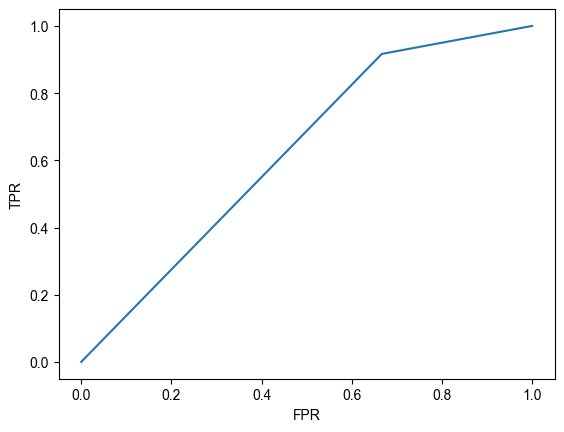

In [28]:
fpr_clf,tpr_clf = traing_process_roc(clf,tuned_parameters,x_train,y_train,x_test,y_test)

In [29]:
fpr_clf

array([0.        , 0.66666667, 1.        ])

In [30]:
tpr_clf

array([0.        , 0.91666667, 1.        ])

## XGBoost

# Tuning hyper-parameters for accuracy

[CV 6/10] END max_depth=2, n_estimators=5;, score=(train=0.779, test=0.800) total time=   0.0s
[CV 8/10] END max_depth=2, n_estimators=20;, score=(train=0.736, test=0.444) total time=   0.0s
[CV 6/10] END max_depth=2, n_estimators=50;, score=(train=0.814, test=0.800) total time=   0.1s
[CV 2/10] END max_depth=2, n_estimators=200;, score=(train=0.802, test=0.500) total time=   0.2s
[CV 3/10] END max_depth=5, n_estimators=100;, score=(train=0.965, test=0.900) total time=   0.1s
[CV 4/10] END max_depth=5, n_estimators=100;, score=(train=0.977, test=0.800) total time=   0.1s
[CV 5/10] END max_depth=2, n_estimators=5;, score=(train=0.721, test=0.900) total time=   0.0s
[CV 7/10] END max_depth=2, n_estimators=20;, score=(train=0.793, test=0.889) total time=   0.0s
[CV 7/10] END max_depth=2, n_estimators=50;, score=(train=0.782, test=0.889) total time=   0.1s
[CV 1/10] END max_depth=2, n_estimators=200;, score=(train=0.814, test=0.800) total time=   0.2

[CV 9/10] END max_depth=2, n_estimators=10;, score=(train=0.816, test=0.222) total time=   0.0s
[CV 7/10] END max_depth=2, n_estimators=200;, score=(train=0.828, test=0.889) total time=   0.2s
[CV 1/10] END max_depth=7, n_estimators=5;, score=(train=0.942, test=0.700) total time=   0.0s
[CV 2/10] END max_depth=7, n_estimators=5;, score=(train=0.930, test=0.600) total time=   0.0s
[CV 9/10] END max_depth=7, n_estimators=10;, score=(train=0.966, test=0.667) total time=   0.0s
[CV 10/10] END max_depth=7, n_estimators=10;, score=(train=0.954, test=0.667) total time=   0.0s
[CV 9/10] END max_depth=7, n_estimators=50;, score=(train=1.000, test=0.222) total time=   0.1s
[CV 10/10] END max_depth=7, n_estimators=50;, score=(train=0.989, test=0.667) total time=   0.1s
[CV 9/10] END max_depth=7, n_estimators=200;, score=(train=1.000, test=0.222) total time=   0.3s
[CV 10/10] END max_depth=7, n_estimators=200;, score=(train=1.000, test=0.667) total time=   0.2s
Fitting 10 folds for each of 80 cand

(array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1]),
 array([0.79510826, 0.80205827, 0.80438385, 0.80438385, 0.81710773,
        0.81941994, 0.82288158, 0.82985833, 0.82639669, 0.83102112,
        0.83564555, 0.83564555, 0.82639669, 0.83102112, 0.83564555,
        0.83564555, 0.87155841, 0.88775728, 0.89238172, 0.89585672,
        0.89355787, 0.90975675, 0.90628174, 0.91553061, 0.91089281,
        0.9248062 , 0.93289227, 0.94792836, 0.91208233, 0.9248062 ,
        0.93635392, 0.9467923 , 0.92015504, 0.92707832, 0.93170275,
        0.9386394 , 0.93978883, 0.95371558, 0.95601443, 0.96761561,
        0.96642609, 0.96758888, 0.97

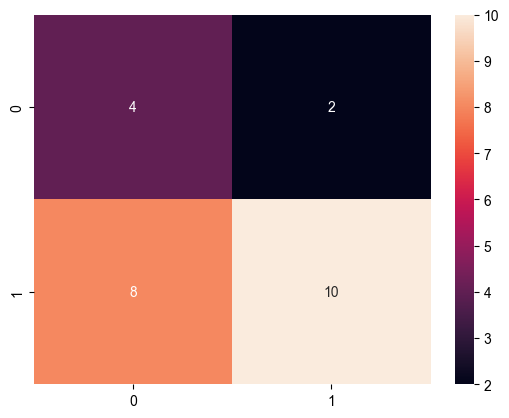

In [31]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(random_state=0)
param_test1 =  {'learning_rate': [0.01,0.1,0.25,0.5,0.6],
              'n_estimators': [50,60,70,80],
              'max_depth': [2,3,5,7]}
                
traing_process_accurary(xgbc,param_test1,x_train,y_train,x_test,y_test)

[CV 3/10] END learning_rate=0.01, max_depth=2, n_estimators=60;, score=(train=0.814, test=0.800) total time=   0.0s
[CV 6/10] END learning_rate=0.01, max_depth=3, n_estimators=80;, score=(train=0.802, test=0.800) total time=   0.0s
[CV 2/10] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=(train=0.872, test=0.600) total time=   0.0s
[CV 1/10] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=(train=0.814, test=0.700) total time=   0.0s
[CV 2/10] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=(train=0.872, test=0.600) total time=   0.0s
[CV 5/10] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=(train=0.884, test=0.900) total time=   0.0s
[CV 6/10] END learning_rate=0.1, max_depth=2, n_estimators=50;, score=(train=0.860, test=0.900) total time=   0.0s
[CV 1/10] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=(train=0.872, test=0.700) total time=   0.0s
[CV 2/10] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=(trai

Fitting 10 folds for each of 80 candidates, totalling 800 fits


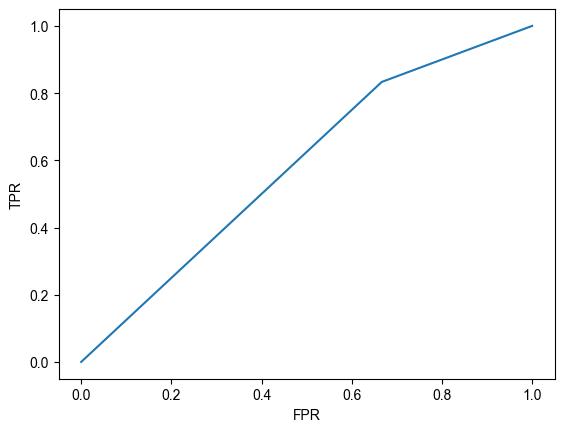

In [32]:
fpr_xgbc,tpr_xgbc = traing_process_roc(xgbc,param_test1,x_train,y_train,x_test,y_test)

In [33]:
fpr_xgbc

array([0.        , 0.66666667, 1.        ])

In [34]:
tpr_xgbc

array([0.        , 0.83333333, 1.        ])

## ET


# Tuning hyper-parameters for accuracy

[CV 5/10] END learning_rate=0.01, max_depth=2, n_estimators=60;, score=(train=0.767, test=0.900) total time=   0.1s
[CV 10/10] END learning_rate=0.01, max_depth=3, n_estimators=60;, score=(train=0.839, test=0.444) total time=   0.0s
[CV 2/10] END learning_rate=0.01, max_depth=3, n_estimators=80;, score=(train=0.872, test=0.600) total time=   0.0s
[CV 10/10] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=(train=0.839, test=0.444) total time=   0.0s
[CV 5/10] END learning_rate=0.01, max_depth=5, n_estimators=80;, score=(train=0.826, test=0.800) total time=   0.0s
[CV 6/10] END learning_rate=0.01, max_depth=5, n_estimators=80;, score=(train=0.837, test=0.700) total time=   0.0s
[CV 7/10] END learning_rate=0.01, max_depth=7, n_estimators=80;, score=(train=0.816, test=0.667) total time=   0.0s
[CV 8/10] END learning_rate=0.01, max_depth=7, n_estimators=80;, score=(train=0.816, test=1.000) total time=   0.0s
[CV 1/10] END learning_rate=0.

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10] END max_depth=5, min_samples_leaf=2, n_estimators=90;, score=(train=0.930, test=0.700) total time=   0.1s
[CV 2/10] END max_depth=5, min_samples_leaf=2, n_estimators=130;, score=(train=0.953, test=0.700) total time=   0.1s
[CV 10/10] END max_depth=5, min_samples_leaf=2, n_estimators=130;, score=(train=0.943, test=0.778) total time=   0.1s
[CV 8/10] END max_depth=5, min_samples_leaf=2, n_estimators=170;, score=(train=0.908, test=0.778) total time=   0.2s
[CV 8/10] END max_depth=5, min_samples_leaf=3, n_estimators=90;, score=(train=0.851, test=0.778) total time=   0.1s
[CV 3/10] END max_depth=5, min_samples_leaf=3, n_estimators=130;, score=(train=0.919, test=0.900) total time=   0.1s
[CV 7/10] END max_depth=5, min_samples_leaf=3, n_estimators=170;, score=(train=0.885, test=0.778) total time=   0.2s
[CV 8/10] END max_depth=5, min_samples_leaf=4, n_estimators=90;, score=(train=0.885, test=0.778) total time=   0.1s
[

[CV 7/10] END max_depth=8, min_samples_leaf=7, n_estimators=130;, score=(train=0.851, test=0.778) total time=   0.1s[CV 2/10] END max_depth=5, min_samples_leaf=2, n_estimators=110;, score=(train=0.953, test=0.700) total time=   0.1s
[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=150;, score=(train=0.931, test=0.222) total time=   0.1s
[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=190;, score=(train=0.931, test=0.222) total time=   0.2s
[CV 9/10] END max_depth=5, min_samples_leaf=3, n_estimators=130;, score=(train=0.908, test=0.222) total time=   0.1s
[CV 8/10] END max_depth=5, min_samples_leaf=3, n_estimators=170;, score=(train=0.862, test=0.778) total time=   0.2s
[CV 7/10] END max_depth=5, min_samples_leaf=4, n_estimators=90;, score=(train=0.874, test=0.778) total time=   0.1s
[CV 2/10] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=(train=0.895, test=0.600) total time=   0.1s
[CV 5/10] END max_depth=5, min_samples_leaf=4, n_estimators=170;, 

[CV 10/10] END max_depth=8, min_samples_leaf=7, n_estimators=170;, score=(train=0.862, test=0.667) total time=   0.2s
{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 190}
0.7888888888888889

Grid scores on development set:
test set：0.744 (+/-0.401) training set：0.928 (+/-0.029)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 90}
test set：0.746 (+/-0.408) training set：0.933 (+/-0.027)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 110}
test set：0.736 (+/-0.387) training set：0.935 (+/-0.023)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 130}
test set：0.736 (+/-0.387) training set：0.934 (+/-0.029)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 150}
test set：0.736 (+/-0.387) training set：0.934 (+/-0.023)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 170}
test set：0.736 (+/-0.387) training set：0.934 (+/-0.023)for {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 190}
test set：0.746 (+/-0.377) training set：0.891 (+/-0

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1]),
 array([0.92826784, 0.93290564, 0.93520449, 0.93405507, 0.93405507,
        0.93405507, 0.89124566, 0.89935846, 0.89819567, 0.90049452,
        0.89933173, 0.9028201 , 0.88310612, 0.88428228, 0.88428228,
        0.88660786, 0.88775728, 0.88774392, 0.85418337, 0.85648222,
        0.85879444, 0.86226945, 0.86343224, 0.86226945, 0.84721999,
        0.84954558, 0.85185779, 0.850695  , 0.85302058, 0.85302058,
        0.84493451, 0.84723336, 0.8425822 , 0.84375835, 0.84840952,
        0.84378508, 0.94100508, 0.9467923 , 0.94911788, 0.94913125,
        0.9467923 , 0.94911788, 0.90

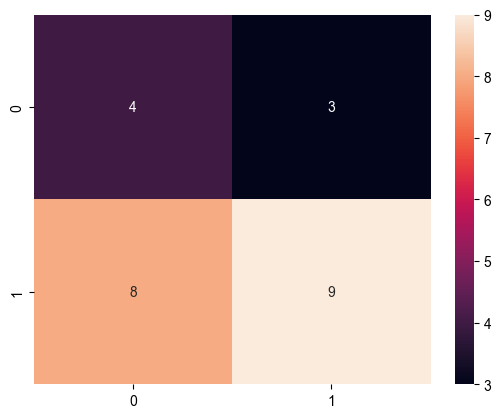

In [35]:
parameters = {
    'n_estimators': list(range(90, 200, 20)),
    'max_depth': list(range(5, 10, 1)),
    'min_samples_leaf': list(range(2, 8, 1))
}
extra = ExtraTreesClassifier(random_state=0)
traing_process_accurary(extra, parameters, x_train,y_train,x_test,y_test)


[CV 9/10] END max_depth=8, min_samples_leaf=7, n_estimators=130;, score=(train=0.874, test=0.222) total time=   0.1s
[CV 7/10] END max_depth=8, min_samples_leaf=7, n_estimators=170;, score=(train=0.839, test=0.778) total time=   0.2s
[CV 5/10] END max_depth=9, min_samples_leaf=2, n_estimators=90;, score=(train=0.953, test=0.900) total time=   0.1s
[CV 5/10] END max_depth=9, min_samples_leaf=2, n_estimators=110;, score=(train=0.965, test=0.900) total time=   0.1s
[CV 8/10] END max_depth=9, min_samples_leaf=2, n_estimators=150;, score=(train=0.954, test=0.778) total time=   0.1s
[CV 6/10] END max_depth=9, min_samples_leaf=2, n_estimators=190;, score=(train=0.953, test=1.000) total time=   0.2s
[CV 7/10] END max_depth=9, min_samples_leaf=3, n_estimators=130;, score=(train=0.897, test=0.778) total time=   0.1s
[CV 7/10] END max_depth=9, min_samples_leaf=3, n_estimators=170;, score=(train=0.897, test=0.778) total time=   0.2s
[CV 4/10] END max_depth=9, min_samples_leaf=4, n_estimators=90;,

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=90;, score=(train=0.931, test=0.222) total time=   0.1s
[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=130;, score=(train=0.931, test=0.222) total time=   0.1s
[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=170;, score=(train=0.931, test=0.222) total time=   0.2s
[CV 8/10] END max_depth=5, min_samples_leaf=3, n_estimators=90;, score=(train=0.851, test=0.778) total time=   0.1s
[CV 10/10] END max_depth=5, min_samples_leaf=3, n_estimators=110;, score=(train=0.908, test=0.778) total time=   0.1s
[CV 10/10] END max_depth=5, min_samples_leaf=3, n_estimators=150;, score=(train=0.908, test=0.778) total time=   0.1s
[CV 9/10] END max_depth=5, min_samples_leaf=3, n_estimators=190;, score=(train=0.920, test=0.222) total time=   0.2s
[CV 6/10] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=(train=0.872, test=0.900) total time=   0.1s

[CV 10/10] END max_depth=8, min_samples_leaf=7, n_estimators=150;, score=(train=0.851, test=0.667) total time=   0.1s[CV 9/10] END max_depth=5, min_samples_leaf=2, n_estimators=110;, score=(train=0.931, test=0.222) total time=   0.1s
[CV 4/10] END max_depth=5, min_samples_leaf=2, n_estimators=170;, score=(train=0.930, test=0.800) total time=   0.2s
[CV 3/10] END max_depth=5, min_samples_leaf=3, n_estimators=90;, score=(train=0.895, test=0.900) total time=   0.1s
[CV 5/10] END max_depth=5, min_samples_leaf=3, n_estimators=110;, score=(train=0.895, test=0.900) total time=   0.1s
[CV 5/10] END max_depth=5, min_samples_leaf=3, n_estimators=150;, score=(train=0.895, test=0.900) total time=   0.1s
[CV 5/10] END max_depth=5, min_samples_leaf=3, n_estimators=190;, score=(train=0.884, test=0.900) total time=   0.2s
[CV 2/10] END max_depth=5, min_samples_leaf=4, n_estimators=130;, score=(train=0.895, test=0.600) total time=   0.1s
[CV 3/10] END max_depth=5, min_samples_leaf=4, n_estimators=170;,

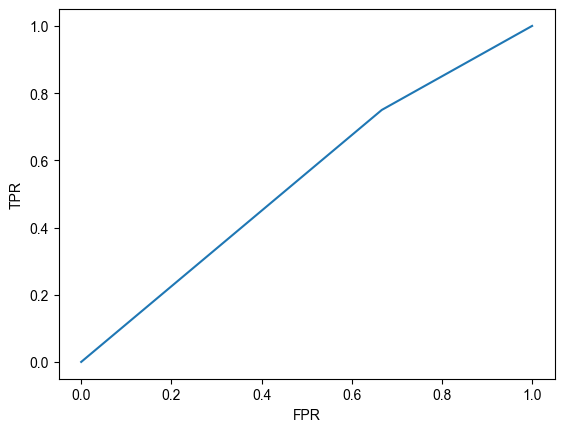

In [36]:
fpr_extra,tpr_extra = traing_process_roc(extra, parameters,x_train,y_train,x_test,y_test)

In [37]:
fpr_extra

array([0.        , 0.66666667, 1.        ])

In [38]:
tpr_extra

array([0.  , 0.75, 1.  ])

## AdaBoost

# Tuning hyper-parameters for accuracy


[CV 1/10] END max_depth=8, min_samples_leaf=7, n_estimators=150;, score=(train=0.837, test=0.700) total time=   0.1s
[CV 1/10] END max_depth=8, min_samples_leaf=7, n_estimators=190;, score=(train=0.837, test=0.800) total time=   0.2s
[CV 9/10] END max_depth=9, min_samples_leaf=2, n_estimators=110;, score=(train=0.977, test=0.222) total time=   0.1s
[CV 7/10] END max_depth=9, min_samples_leaf=2, n_estimators=150;, score=(train=0.931, test=0.778) total time=   0.1s
[CV 8/10] END max_depth=9, min_samples_leaf=2, n_estimators=190;, score=(train=0.954, test=0.889) total time=   0.2s
[CV 7/10] END max_depth=9, min_samples_leaf=3, n_estimators=130;, score=(train=0.897, test=0.778) total time=   0.1s
[CV 6/10] END max_depth=9, min_samples_leaf=3, n_estimators=170;, score=(train=0.907, test=1.000) total time=   0.2s
[CV 7/10] END max_depth=9, min_samples_leaf=4, n_estimators=90;, score=(train=0.862, test=0.667) total time=   0.1s
[CV 7/10] END max_depth=

Fitting 10 folds for each of 72 candidates, totalling 720 fits

{'learning_rate': 1, 'n_estimators': 50}
0.7811111111111111

Grid scores on development set:
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 10}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 15}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 20}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 25}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 50}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 100}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 150}
test set：0.767 (+/-0.325) training set：0.771 (+/-0.035)for {'learning_rate': 0.001, 'n_estimators': 200}
test set

(array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1]),
 array([0.77078321, 0.77078321, 0.77078321, 0.77078321, 0.77078321,
        0.77078321, 0.77078321, 0.77078321, 0.77078321, 0.77078321,
        0.77078321, 0.77078321, 0.77543438, 0.79512163, 0.7985699 ,
        0.80431703, 0.77078321, 0.77078321, 0.77310879, 0.77888265,
        0.79512163, 0.80664261, 0.81476878, 0.81824379, 0.77078321,
        0.77543438, 0.78350708, 0.78703555, 0.79740711, 0.81476878,
        0.81825715, 0.8240711 , 0.77888265, 0.79391874, 0.7985699 ,
        0.79395883, 0.81128041, 0.8205961 , 0.83569901, 0.84147287,
        0.79624432, 0.79395883, 0.80

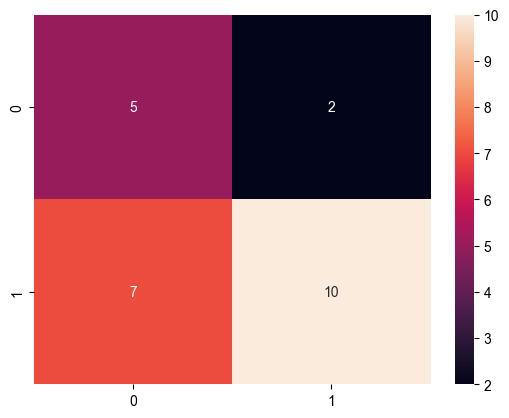

In [39]:
from sklearn.ensemble import AdaBoostClassifier
parameters_ada = {'n_estimators':[10,15,20,25,50,100,150,200],
                  'learning_rate': [0.001,0.01, 0.02,0.03,0.05,0.1, 1,10,20]}
ADA = AdaBoostClassifier(random_state=0)
traing_process_accurary(ADA,parameters_ada,x_train,y_train,x_test,y_test)

[CV 10/10] END learning_rate=0.001, n_estimators=10;, score=(train=0.805, test=0.444) total time=   0.0s
[CV 1/10] END learning_rate=0.001, n_estimators=100;, score=(train=0.756, test=0.900) total time=   0.1s
[CV 1/10] END learning_rate=0.001, n_estimators=200;, score=(train=0.756, test=0.900) total time=   0.3s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=(train=0.779, test=0.900) total time=   0.1s
[CV 1/10] END learning_rate=0.02, n_estimators=10;, score=(train=0.756, test=0.900) total time=   0.0s
[CV 2/10] END learning_rate=0.02, n_estimators=10;, score=(train=0.791, test=0.600) total time=   0.0s
[CV 9/10] END learning_rate=0.02, n_estimators=15;, score=(train=0.793, test=0.556) total time=   0.0s
[CV 10/10] END learning_rate=0.02, n_estimators=15;, score=(train=0.805, test=0.444) total time=   0.0s
[CV 9/10] END learning_rate=0.02, n_estimators=25;, score=(train=0.793, test=0.556) total time=   0.0s
[CV 10/10] END learning_rate=0.02, n_estimators=25;, score=(train

Fitting 10 folds for each of 72 candidates, totalling 720 fits


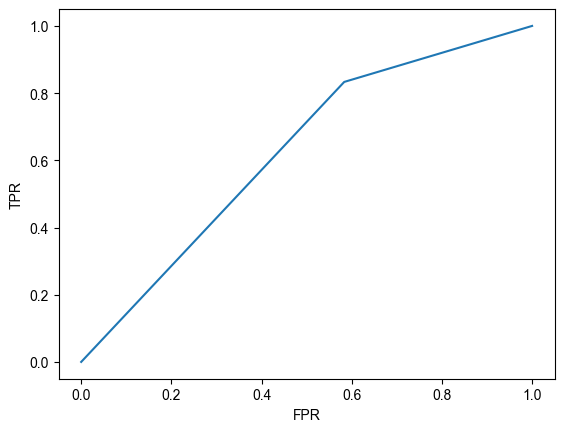

In [40]:
fpr_ADA,tpr_ADA = traing_process_roc(ADA,parameters_ada,x_train,y_train,x_test,y_test)

In [41]:
fpr_ADA

array([0.        , 0.58333333, 1.        ])

In [42]:
tpr_ADA

array([0.        , 0.83333333, 1.        ])